1절에서 순환 신경망의 작동 원리를 알아보았다. 이번에는 IMDB 리뷰 데이터셋을 사용해 간단한 순환 신경망 모델을 훈련해보자. 우리는 이 데이터셋을 아래와 같은 두 가지 방식으로 나누어 해결해볼 예정이다. 

* 원-핫 인코딩
* 단어 임베딩

IMDB 리뷰 데이터셋은 유명한 인터넷 영화 데이터베이스인 imdb.com에서 수집한 리뷰를 감상평에 따라 긍정과 부정으로 분류해 놓은 데이터셋이다. 총 50,000개의 샘플로 이루어져 있고 훈련 데이터와 테스트데이터에 각각 25,000개식 나누어져있다.

* **'자연어 처리(Natural Language processing, NLP)'**는 컴퓨터를 사용해 인간의 언어를 처리하는 분야이다. 대표적인 분야로는 음성 인식, 기계 번역, 감성 분석 등이 있다. IMDB 리뷰를 감상평에 따라 분류하는 작업은 감성 분석에 해당한다. 자연어 처리 분야에서는 훈련 데이터를 **'말뭉치(corpus)'**라고 부른다.

위 데이터의 텍스트 자체를 신경망에 전달하지는 않는다. **컴퓨터에서 처리하는 모든 것은 숫자 데이터기 때문이다.** 앞서 이미지는 정수 픽셀값으로 이루어져 있어 변환하지 않고 사용가능했다. 하지만 텍스트 데이터의 경우 숫자 데이터로의 변환이 필요하다.

단어를 숫자 데이터로 바꾸는 일반적인 방법은 **데이터에 등장하는 단어마다 고유한 정수를 부여**하는 것이다. 예를 들어, 'He'는 10, 'cat'은 13에 매핑하는 것이다. 단, 이 정수는 단어의 의미나 크기와 관련이 없다. 일반적으로 영어 문장은 모두 소문자로 바꾸고 구둣점을 삭제한 다음 공백을 기준으로 분리한다. 이렇게 분리된 단어를 **'토큰(token)'**이라고 부른다. 하나의 샘플은 여러 개의 토큰으로 이루어져 있고 1개의 토큰이 하나의 타임스텝에 해당한다.

* 한국어는 영어 방식과 차이가 있다.

토큰에 할당하는 정수 중에 몇 개는 특정한 용도로 예약되는 경우가 있다. 예를 들어, **0은 패딩, 1은 문장의 시작, 2는 어휘 사전에 없는 토큰**을 나타낸다.

* 훈련 세트에서 고유한 단어를 뽑아 만든 목록을 **'어휘 사전'**이라고 말한다. 예를 들어 테스트 세트 안에 어휘 사전에 없는 단어가 있다면 2로 변환하여 신경망 모델에 주입한다.

실제 IMDB 리뷰 데이터셋은 영어로 된 문장이지만 텐서플로에는 이미 정수로 바꾼 데이터가 포함되어 있다. 여기에서는 전체 데이터셋에서 가장 자주 등장하는 단어 500개만 사용하자. load_data() 함수의 num_words 매개변수를 500으로 지정하면 된다.

In [ ]:
from tensorflow.keras.datasets import imdb
(train_input, train_target), (test_input, test_target) = imdb.load_data(num_words = 500)

17473536/17464789 [==============================] - 0s 0us/step


훈련 세트와 테스트 세트의 크기를 확인해보자.

In [ ]:
print(train_input.shape, test_input.shape)

(25000,) (25000,)


앞서 말한 것과 같이 25,000개씩 데이터를 가지고 있다. 이때 텍스트의 길이가 각각 다르므로2차원 배열에 담기보다 변도의 파이썬 리스트로 담아야 메모리를 효율적으로 사용할 수 있다. 따라서 (25000,)와 같이 1차원 배열로 이루어져 있는 것이다. 훈련 데이터 세트의 타입을 알아보자.

In [ ]:
print(type(train_input), type(train_input[0]))

<class 'numpy.ndarray'> <class 'list'>


훈련 데이터는 넘파이 배열이며 내부의 원소들은 파이썬 리스트 객체이다. 이번에는 첫 번째 리뷰의 길이를 출력해보자.

In [ ]:
print(len(train_input[0]))

218


두 번째 리뷰의 길이를 출력해보자.

In [ ]:
print(len(train_input[1]))

189


이와 같이 리뷰의 길이는 각각 다르다. 여기서 하나의 리뷰가 하나의 샘플이 된다. 이제 첫 번째 리뷰에 담긴 내용을 출력해보자.

In [ ]:
print(train_input[0])

[1, 14, 22, 16, 43, 2, 2, 2, 2, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 2, 112, 50, 2, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 2, 17, 2, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 469, 4, 22, 71, 87, 12, 16, 43, 2, 38, 76, 15, 13, 2, 4, 22, 17, 2, 17, 12, 16, 2, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 2, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 2, 36, 71, 43, 2, 476, 26, 400, 317, 46, 7, 4, 2, 2, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]


앞서 말했듯이** 텐서플로에 있는 IMDB 리뷰 데이터는 이미 정수로 변환되어 있다**. 앞서 num_words = 500으로 지정했기 때문에 **어휘 사전에는 500개의 단어만 들어가있다**. 따라서 어휘 사전에 없는 단어는 모두 2로 표시된다.

이번에는 타깃 테이터를 출력해보자.

In [ ]:
print(train_target[:20])

[1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 1]


해결할 문제는 리뷰가 긍정인지 부정인지 판단하는 것이다. 따라서 이진 분류 문제로 볼 수 있으므로 타깃값이 0(부정)과 1(긍정)로 나누어진다.

이제 훈련 세트에서 검증 세트를 분리해보자.

In [ ]:
from sklearn.model_selection import train_test_split
train_input, val_input, train_target, val_target = train_test_split(train_input, train_target, test_size = 0.2, random_state = 42)

이제 훈련 세트에 대해 몇 가지 조사를 해보자. 먼저 각 리뷰의 길이를 계산해 넘파이 배열에 담자. 넘파이 배열에 담는 이유는 평균적인 리뷰의 길이와 가장 짧은 리뷰의 길이 그리고 가장 긴 리뷰의 길이를 확인하기 위해서이다. 

In [ ]:
import numpy as np
lengths = np.array([len(x) for x in train_input])

lengths 배열이 준비되었으므로 넘파이 **mean() 함수**와 **median() 함수**를 사용해 리뷰 길이의 평균과 중간값을 구해보자.

In [ ]:
print(np.mean(lengths), np.median(lengths))

239.00925 178.0


리뷰의 평균 단어 개수는 239개이고 중간값이 178인 것을 보아 리뷰 길이 데이터는 한쪽에 치우친 분포일 것이다. lengths 배열을 히스토그램에 표현해보자.

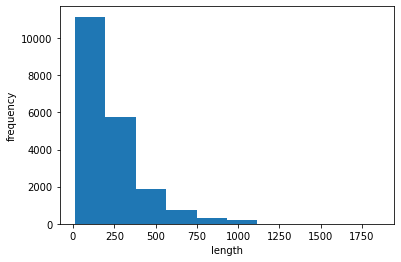

In [ ]:
import matplotlib.pyplot as plt
plt.hist(lengths)
plt.xlabel('length')
plt.ylabel('frequency')
plt.show()

데이터가 한 쪽으로 치우쳐있는 것을 알 수 있다. 대부분의 리뷰는 300 미만이며 평균이 중간값보다 높은 이유는 오른쪽 끝에 아주 큰 데이터가 있기 때문이다. 

리뷰는 대체로 짧으므로 100개의 단어만 사용하기로 하자. 이때 리뷰들의 길이를 100에 맞추기 위해 **100보다 짧은 리뷰는 패딩을 사용하고, 긴 리뷰는 길이가 100이 되도록 잘라야한다**. 일반적으로 패딩을 나타내는 토큰으로는 0을 사용한다. 케라스는 시퀀스 데이터의 길이를 맞추는 **pad_sequences() 함수**를 제공한다. 이 함수를 사용해 train_input의 길이를 100으로 맞춰보자.

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
train_seq = pad_sequences(train_input, maxlen = 100)

maxlen에 원하는 길이를 지정하면 이보다 긴 경우는 잘라내고 짧은 경우는 0으로 패딩한다. 패딩된 결과를 확인하기 위해 크기를 출력해보자.

In [ ]:
print(train_seq.shape)

(20000, 100)


이번에는 train_seq에 저장된 첫 번째 샘플을 출력해보자.

In [ ]:
print(train_seq[0])

[ 10   4  20   9   2 364 352   5  45   6   2   2  33 269   8   2 142   2
   5   2  17  73  17 204   5   2  19  55   2   2  92  66 104  14  20  93
  76   2 151  33   4  58  12 188   2 151  12 215  69 224 142  73 237   6
   2   7   2   2 188   2 103  14  31  10  10 451   7   2   5   2  80  91
   2  30   2  34  14  20 151  50  26 131  49   2  84  46  50  37  80  79
   6   2  46   7  14  20  10  10 470 158]


앞뒤에 패딩값 0이 없다. 따라서 이전 첫 번째 샘플은 100보다 길이가 길었을 것이다. 이전 데이터 train_input에서 첫 번째 샘플의 끝을 확인해보자.

In [ ]:
print(train_input[0][-10:])

[6, 2, 46, 7, 14, 20, 10, 10, 470, 158]


원본 데이터의 끝과 변환한 데이터의 끝이 일치한다. 즉, pad_sequences() 함수는 기본적으로 샘플의 앞부분을 자른다는 사실을 알 수 있다.

**pad_sequences() 함수는 기본으로 maxlen보다 긴 시퀀스의 앞부분을 자른다.** 일반적으로 시퀀스의 뒷부분의 정보가 더 유용할 것이라 기대하기 때문이다. 만약 시퀀스의 뒷부분을 자르고 싶다면 **truncating 매개변수**의 값을 기본값 'pre'가 아닌 'post'로 바꾸면 된다. 

이번에는 여섯 번째 샘플을 출력해보자.

In [ ]:
print(train_seq[5])

[  0   0   0   0   1   2 195  19  49   2   2 190   4   2 352   2 183  10
  10  13  82  79   4   2  36  71 269   8   2  25  19  49   7   4   2   2
   2   2   2  10  10  48  25  40   2  11   2   2  40   2   2   5   4   2
   2  95  14 238  56 129   2  10  10  21   2  94 364 352   2   2  11 190
  24 484   2   7  94 205 405  10  10  87   2  34  49   2   7   2   2   2
   2   2 290   2  46  48  64  18   4   2]


이전과 같은 이유로 100보다 길이가 짧으면 시퀀스의 앞에 0을 추가한다. 시퀀스의 마지막에 있는 단어가 셀의 은닉 상태에 가장 큰 영향을 미치게 되므로 마지막에 패딩을 추가하는 것은 일반적으로 선호하지 않는다. 하지만 원한다면 **padding 매개변수**의 기본값인 'pre'를 'post'로 바꾸면 된다.

도일한 방식으로 검증 세트의 길이도 100으로 바꾸자.

In [ ]:
val_seq = pad_sequences(val_input, maxlen = 100)

이제 순환 신경망 모델을 만들어보자.

케라스는 여러 종류의 순환층 클래스를 제공한다. 그중 가장 간단한 것은 **SimpleRNN 클래스**이다. 이 클래스는 1절에서 설명한 것과 거의 비슷한 기능을 수행한다. 이진 분류이므로 마지막 출력층은 1개의 뉴런을 가지고 시그모이드 활성화 함수를 사용해야한다. 층을 구성해보자.

In [ ]:
from tensorflow import keras
model = keras.Sequential()
model.add(keras.layers.SimpleRNN(8, input_shape = (100, 500)))
model.add(keras.layers.Dense(1, activation = 'sigmoid'))

SimpleRNN 클래스의 **activation 매개변수**의 기본값은 **'tanh'**로 하이퍼볼릭 탄젠트 함수를 사용한다. 여기서는 기본값을 그대로 사용하기로 하자.

입력 차원의 첫 번째 차원은 **샘플의 길이를 100으로 지정했기 때문에 100으로 지정**했다. 

그럼 500은 어디서 온 숫자일까? 이전 섹션에서 만든 train_seq와 val_seq에는 큰 문제가 있다. **토큰을 정수로 변환한 데이터를 신경망에 주입하면 큰 정수가 큰 활성화 출력을 만들기 때문이다.** 예를 들어, 20번 토큰을 10번 토큰보다 더 중요시해야 할 이유가 없다. 따라서 단순한 정숫값을 신경망에 입력하기 위해서 다른 방식을 찾아야 한다.

정숫값에 있는 크기 속성을 없애고 각 정수를 고유하게 표현하는 방법에는 **'원-핫 인코딩'**이 있다. 예를 들어 토큰 10을 원-핫 인코딩으로 바꾸면 아래와 같다.

* [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ..., 0]
* 원-핫 인코딩은 정숫값을 배열에서 해당 정수 위치의 원소만 1이고 나머지는 모두 0으로 변환한다. 따라서 토큰 10을 원-핫 인코딩으로 변환하면 열한 번째 원소만 1이고 나머지는 0이된다.

우리는 imdb.data_load() 함수에서 num_words를 500으로 지정했다. 따라서 토큰의 범위는 0~499일 것이다. 따라서 **이 범위를 원-핫 인코딩으로 표현하려면 배열의 길이가 500이어야 한다**.

케라스에서는 원-핫 인코딩을 위해서 keras.utils 패키지 아래에 **to_categorical() 함수**를 제공한다. 정수 배열을 입력하면 자동으로 원-핫 인코딩된 배열을 반환해준다.

In [ ]:
train_oh = keras.utils.to_categorical(train_seq)

train_oh의 크기를 확인해보자.

In [ ]:
print(train_oh.shape)

(20000, 100, 500)


샘플 데이터의 크기가 1차원 정수 (100,)에서 2차원 배열 (100, 500)으로 바뀌었다. 따라서 input_shape 매개변수의 값을 (100, 500)으로 지정한 것이다.

잘 인코딩 되었는지 첫 번째 샘플의 첫 번째 토큰 10을 확인해보자.

In [ ]:
print(train_oh[0][0][:12])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


나머지 원소가 모두 1인지 확인해보자. 모든 원소의 값을 더했을 때 1이 되면 된다.

In [ ]:
print(np.sum(train_oh[0][0]))

1.0


같은 방식으로 val_seq도 원-핫 인코딩으로 바꾸자.

In [ ]:
val_oh = keras.utils.to_categorical(val_seq)

앞서 만든 모델의 구조를 출력해보자.

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 8)                 4072      
_________________________________________________________________
dense (Dense)                (None, 1)                 9         
Total params: 4,081
Trainable params: 4,081
Non-trainable params: 0
_________________________________________________________________


SimpleRNN에 전달할 샘플의 크기는 (100, 500)이다. 순환층의 모델 파라미터를 계산해보자. 500 차원의 원-핫 인코딩 배열이 순환층 뉴런 8개와 완전히 연결되므로 500 × 8 = 4,000개의 가중치가 존재한다. 타임스텝에 사용될 가중치는 8(은닉 상태의 크기) × 8(뉴런의 개수) = 64개가 존재한다. 그리고 절편은 뉴런의 개수만큼 존재하므로 총 8개가 있을 것이다. 따라서 4000 + 64 + 8 = 4072로 총 4072개의 모델 파라미터가 필요하다.

모델을 훈련시켜보자. RMSprop의 학습률을 0.0001로 낮추기 위해 객체를 하나 생성하고 에포크 횟수를 100, 배치 크기는 64로 늘려 훈련하기로 하자.

In [ ]:
rmsprop = keras.optimizers.RMSprop(learning_rate = 1e-4)
model.compile(optimizer = rmsprop, loss = 'binary_crossentropy', metrics = ['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint("best-simplernn-model.h5", save_best_only = True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 3, restore_best_weights = True)
history = model.fit(train_oh, train_target, epochs = 100, batch_size = 64, validation_data = (val_oh, val_target), callbacks = [checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 16s 46ms/step - loss: 0.7041 - accuracy: 0.4987 - val_loss: 0.7011 - val_accuracy: 0.4960
Epoch 2/100
313/313 [==============================] - 14s 45ms/step - loss: 0.6970 - accuracy: 0.5120 - val_loss: 0.6972 - val_accuracy: 0.5036
Epoch 3/100
313/313 [==============================] - 14s 45ms/step - loss: 0.6925 - accuracy: 0.5245 - val_loss: 0.6939 - val_accuracy: 0.5110
Epoch 4/100
313/313 [==============================] - 13s 42ms/step - loss: 0.6891 - accuracy: 0.5361 - val_loss: 0.6913 - val_accuracy: 0.5234
Epoch 5/100
313/313 [==============================] - 13s 43ms/step - loss: 0.6861 - accuracy: 0.5484 - val_loss: 0.6890 - val_accuracy: 0.5326
Epoch 6/100
313/313 [==============================] - 13s 42ms/step - loss: 0.6824 - accuracy: 0.5639 - val_loss: 0.6855 - val_accuracy: 0.5464
Epoch 7/100
313/313 [==============================] - 13s 43ms/step - loss: 0.6731 - accuracy: 0.5908 - val_loss: 0.6586 - val_ac

마흔 번째 에포크에서 조기 종료되었다. 검증 세트에 대한 정확도는 약 80% 정도이다. 뛰어난 성능은 아니지만 어느 정도 분류는 가능하다고 판단할 수 있다. 

훈련 손실과 검증 손실 그래프를 그려 훈련 과정을 살펴보자.

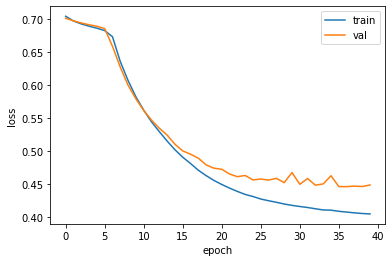

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

적절한 에포크에서 훈련을 멈춘 것 같다. 하지만 한 가지 생각할 점이 있다. 우리는 이 작업을 위해 입력 데이터를 원-핫 인코딩으로 변환했다. **원-핫 인코딩은 입력 데이터가 엄청 커지는 단점을 가진다.** 실제로 train_seq와 train_oh 배열의 **nbytes 속성**을 출력하여 크기를 확인해보자.

In [ ]:
print(train_seq.nbytes, train_oh.nbytes)

8000000 4000000000


토큰 1개를 500차원으로 늘렸기 때문에 대략 500배가 커진다. 훈련 데이터가 커질수록 더 문제가 커질 것이다.

순환 신경망에서 텍스트를 처리할 때 즐겨 사용하는 방법은 **'단어 임베딩(word embedding)'**이다. 단어 임베딩은 각 단어를 고정된 크기의 실수 벡터로 바꾼다.

단어 임베딩으로 만들어진 벡터는 원-핫 인코딩된 벡터보다 훨씬 의미 있는 값으로 채워져 있기 때문에 자연어 처리에서 더 좋은 성능을 내는 경우가 많다. 케라스에서는 keras.layers 패키지 아래에 **Embedding 클래스**를 제공한다. 이 클래스를 다른 층처럼 모델에 추가하면 처음에는 모든 벡터가 랜덤하게 초기화되지만 훈련을 통해 데이터에서 좋은 단어 임베딩을 학습한다.

앞서 원-핫 인코딩으로 데이터를 (100, 500)으로 변환했지만 임베딩을 사용하면 (100, 20)정도로 훨씬 작은 크기로 단어를 잘 표현할 수 있다. Embedding 클래스를 SimpleRNN 클래스 앞에 추가해 두 번째 순환 신경망을 만들어보자.

In [ ]:
model2 = keras.Sequential()
model2.add(keras.layers.Embedding(500, 16, input_length = 100))
model2.add(keras.layers.SimpleRNN(8))
model2.add(keras.layers.Dense(1, activation = 'sigmoid'))

Embedding 클래스의 첫 번째 매개변수는 **어휘 사전의 크기**이다. 두 번째 매개변수는 **임베딩 벡터의 크기**이다. 세 번째 **input_length 매개변수**는 입력 시퀀스의 길이이다. 앞서 샘플의 길이를 100으로 맞췄으므로 100으로 지정했다. 이후 구조는 이전과 동일하다.

In [ ]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 16)           8000      
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 8)                 200       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 9         
Total params: 8,209
Trainable params: 8,209
Non-trainable params: 0
_________________________________________________________________


Embedding 클래스는 500개의 각 토큰을 크기가 16인 데이터로 변경한다. 따라서 총 500 × 16 = 8000 개의 모델 파라미터를 가진다. SimpleRNN은 이전과 같은 방식으로 계산하면 된다.

이전과 동일하게 모델을 훈련해보자.

In [ ]:
rmsprop = keras.optimizers.RMSprop(learning_rate = 1e-4)
model2.compile(optimizer = rmsprop, loss = 'binary_crossentropy', metrics = ['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint("best=embedding-model.h5", save_best_only = True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 3, restore_best_weights = True)
history = model2.fit(train_seq, train_target, epochs = 100, batch_size = 64, validation_data = (val_seq, val_target), callbacks = [checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 9s 25ms/step - loss: 0.6763 - accuracy: 0.5746 - val_loss: 0.6488 - val_accuracy: 0.6490
Epoch 2/100
313/313 [==============================] - 7s 24ms/step - loss: 0.6317 - accuracy: 0.6793 - val_loss: 0.6197 - val_accuracy: 0.6964
Epoch 3/100
313/313 [==============================] - 7s 24ms/step - loss: 0.6019 - accuracy: 0.7218 - val_loss: 0.5930 - val_accuracy: 0.7364
Epoch 4/100
313/313 [==============================] - 8s 24ms/step - loss: 0.5765 - accuracy: 0.7466 - val_loss: 0.5732 - val_accuracy: 0.7422
Epoch 5/100
313/313 [==============================] - 8s 25ms/step - loss: 0.5548 - accuracy: 0.7613 - val_loss: 0.5583 - val_accuracy: 0.7438
Epoch 6/100
313/313 [==============================] - 7s 24ms/step - loss: 0.5366 - accuracy: 0.7704 - val_loss: 0.5447 - val_accuracy: 0.7612
Epoch 7/100
313/313 [==============================] - 8s 24ms/step - loss: 0.5200 - accuracy: 0.7814 - val_loss: 0.5294 - val_accuracy:

순환층의 가중치 개수가 훨씬 작아졌고 훈련 세트의 크기도 훨씬 줄었지만 원-핫 인코딩 모델과 비슷한 성능을 냈다. 마지막으로 훈련 손실과 검증 손실 그래프를 출력해보자.

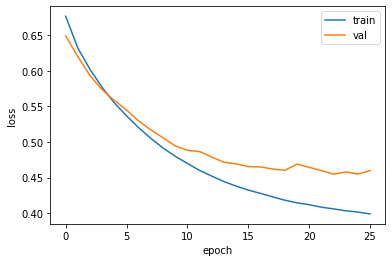

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

검증 손실이 더 감소되지 않아 적절하게 조기 종료된 것 같다.

# 정리

핵심 포인트
* 말뭉치: **자연어 처리에서 사용하는 텍스트 데이터의 모음, 즉 훈련 데이터 셋을 일컫는다.**
* 토큰: **텍스트에서 공백으로 구분되는 문자열**을 말한다. 종종 소문자로 변환하고 구둣점은 삭제한다.
* 원-핫 인코딩: **어떤 클래스에 해당하는 원소만 1이고 나머지는 모두 0인 벡터**이다. 정수로 변환된 토큰을 원-핫 인코딩으로 변화하려면 **어휘 사전 크기의 벡터가 만들어진다**.
* 단어 임베딩: **정수로 변환된 토큰을 비교적 작은 크기의 실수 밀집 벡터로 변환한다.** 이런 밀집 벡터는 단어 사이의 관계를 표현할 수 있기 때문에 자연어 처리에서 좋은 성능을 발휘한다.

핵심 패키지와 함수

TensorFlow
* pad_sequences(): **시퀀스의 길이를 맞추기 위해 패딩을 추가한다.** 이 함수는 (샘플 개수, 타임스텝 개수) 크기의 2차원 배열을 기대한다. **maxlen 매개변수**로 원하는 시퀀스 길이를 지정할 수 있다. 이 값보다 긴 시퀀스는 잘리고 짧은 시퀀스는 패딩된다. 매개변수를 지정하지 않으면 가장 긴 시퀀스의 길이가 된다. **padding 매개변수**는 패딩을 추가할 위치를 지정한다. 기본값인 'pre'는 시퀀스 앞에 패딩을 추가하고 'post'는 시퀀스 뒤에 패딩을 추가한다. **truncating 매개변수**는 긴 시퀀스에서 잘라버릴 위치를 지정한다. 기본값인 'pre'는 시퀀스 앞부분을 자르고 'post'는 시퀀스 뒷부분을 자른다.
* to_categorical(): **정수 시퀀스를 원-핫 인코딩으로 변환한다.** 토큰을 원-핫 인코딩하거나 타깃값을 원-핫 인코딩할 때 사용한다. **num_classes 매개변수**에서 클래스 개수를 지정한다. 지정하지 않으면 데이터에서 자동으로 찾는다.
* SimpleRNN: **케라스의 기본 순환층 클래스이다.** 첫 번째 매개변수에 **뉴런의 개수**를 지정한다. **activaion 매개변수**에 활성화 함수를 지정하며 기본값은 'tanh'이다. **dropout 매개변수**에서 입력에 대한 드롭아웃 비율을 지정할 수 있다. **return_sequences 매개변수**에서 모든 타임스텝의 은닉 상태를 출력할지 결정한다. 기본값은 False이다.
* Embedding: **단어 임베딩을 위한 클래스이다.** 첫 번째 매개변수에서 **어휘 사전의 크기**를 지정한다. 두 번째 매개변수에서 Embedding 층이 출력할 **밀집 벡터의 크기**를 지정한다. **input_length 매개변수**에서 **입력 시퀀스의 길이**를 지정한다. 이 매개변수는 Embedding 층 바로 뒤에 Flatten이나 Dense 클래스가 올 때 꼭 필요하다.